# Fourierovská komprese obrazu
* Pokuď nemáš páru, co je to Fourierovská transformace (FT), mrkni na INTRO sešit zde (odkaz v popisku videa).
* Idea je jednoduchá, pojďme provést FT obrázku.
* Kouknem, jak vypadá, a aplikujeme na tento nový obrázek filtr, vlastně ho jen ořízneme.
* A pak provedem zpětnou FT (většinou nazývanou inverzní iFT).
* Porovnáme s originálem a vyhodnotíme kompresní poměr.

## Obrázek, který jsem vybral je portrét slovutného Josepha Fouriera

In [1]:
# import modulů
from PIL import Image,ImageOps
import scipy.fftpack as fp

import numpy as np
import matplotlib.pyplot as plt

### Vykreslení krásy Josepha Fouriera
portrét z [wikipedie](https://en.wikipedia.org/wiki/Joseph_Fourier#/media/File:Fourier2_-_restoration1.jpg), který jsem převedl do černobílé škály.

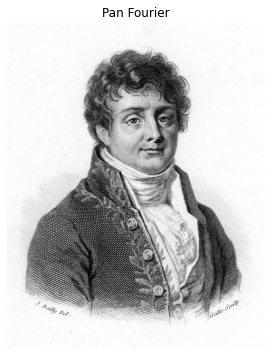

In [2]:
# načtení obrázku
img = Image.open('../../resource/fig/fourier_greyscale.png').convert('L')

# vykreslení
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Pan Fourier')
plt.show()

### Aplikujeme FT
* `fft.fft2` je dvou-dimensionální FT, pro 1D, použij `fft.fft`
* Pro hezčí zobrazení, `fft.fftshift` se postará o symetrii FT a posune nám frekvenci 0 doprostřed obrázku.

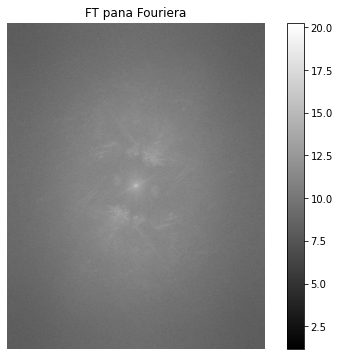

In [5]:
img_ft = np.fft.fftshift(np.fft.fft2(img))

plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('FT pana Fouriera')
plt.show()

* Bílé oblasti ukazují frekvence s vyšší amplitudou (nesou více informace).
* Středový bod je frekvence=0, dále od středu se vyskytují body s vzšší frekvencí, což znamená větší detaily obrázku.
* Vyšší frekvence jsou méně jasné, proto je ořízneme. Tím se jich zbavíme, ale také zmenšíme velikost obrázku, tedy ho zkomprimujeme.
### Filtrování Sira Josepha

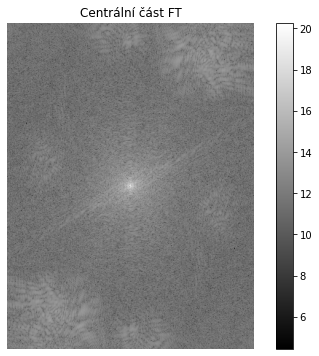

In [7]:
# zahazuji 800 řádků zleva i zprava
# a 640 sloupců zhora i zdola
# Nový obrázek jde od indexu 800 nebo 640 až do posledního mínus číslo, které 
# následuje (800 nebo 640)
img_ft_maly = img_ft[800:-800, 640:-640]
plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft_maly)), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('Centrální část FT')
plt.show()

### Teď přejdem zpět, nejprve aplikujeme `ifftshift` funkci (vnitřní) a pak `ifft2` (vnější)

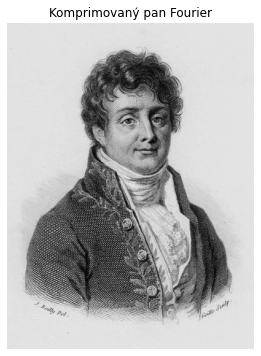

In [8]:
img_filt = np.fft.ifft2(np.fft.ifftshift(img_ft_maly))

plt.figure(figsize=(8, 6))
plt.imshow(abs(img_filt), cmap='gray')
plt.axis('off')
plt.title('Komprimovaný pan Fourier')
plt.show()

In [9]:
print('originální rozměr v pixelech (řádky, sloupce): ', img_ft.shape)
print('filtrovaný rozměr v pixelech (řádky, sloupce): ', img_filt.shape)
velikost_orig = np.prod(img_ft.shape)  # vynásobení řádků * sloupců
velikost_filt = np.prod(img_filt.shape)

originální rozměr v pixelech (řádky, sloupce):  (2048, 1619)
filtrovaný rozměr v pixelech (řádky, sloupce):  (448, 339)


### Kompresní poměr
* zde vypočtený ve formě takzvaného *ušetřeného místa (space saving)*.
* který vyjadřuje kolik procent na disku jsme ušetřili v porovnání s originálem.

In [10]:
100*(1-(velikost_filt/velikost_orig))

95.41962631253861

## Stále dobrý Fourier, i po zahození 95% pixelů, ale těch správných. Dobrá práce!

### Otázky:
1. Kam až můžete jít s filtrováním než uvidíte rozmazání obrázku?